 *MHWs plot categories*

In [1]:
# Load required modules
import numpy as np
from datetime import date
from matplotlib import pyplot as plt
%pylab inline
from event_line_cat import *


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load marineHeatWaves definition module
import marineHeatWaves as mhw

In [3]:
# Generate time vector using datetime format (January 1 of year 1 is day 1)
t = np.arange(date(1982,1,1).toordinal(),date(2014,12,31).toordinal()+1)
dates = [date.fromordinal(tt.astype(int)) for tt in t]
# Generate synthetic temperature time series
sst = np.zeros(len(t))
sst[0] = 0 # Initial condition
a = 0.85 # autoregressive parameter
for i in range(1,len(t)):
    sst[i] = a*sst[i-1] + 0.75*np.random.randn() + 0.5*np.cos(t[i]*2*np.pi/365.25)
sst = sst - sst.min() + 5.

In [4]:
mhws, clim = mhw.detect(t, sst)

In [5]:
# Select the event
ev = np.argmax(mhws['intensity_max']) 

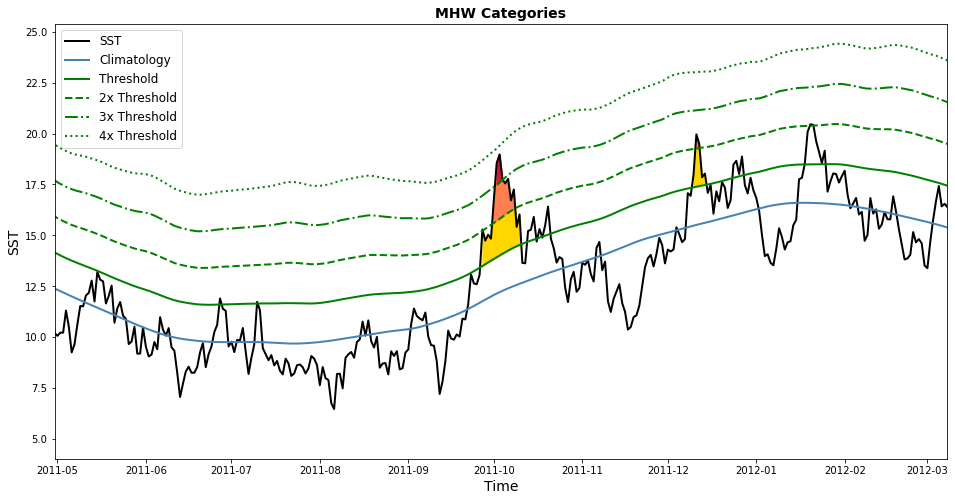

In [6]:
event_line_cat(ev,sst,t,mhws,clim)